# Machine learning-based prediction of COVID-19 diagnosis based on symptoms

To delve deeper into details about the dataset and model: https://docs.google.com/document/d/101CHjVjsDVh6TEnL_tgy6WcuD1y6gc2n5DfpRygjcW0/edit?usp=sharing

In [1]:
#Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data
df = pd.read_csv("corona_tested_006.csv")

C:\Users\RIYA BONGIRWAR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.sample(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
173618,173619,17-04-2020,False,False,False,False,False,negative,None,male,Other
264894,264895,28-04-2020,False,False,False,False,False,negative,None,female,Other
156412,156413,15-04-2020,False,False,False,False,False,negative,None,male,Other
19124,19125,23-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,female,Other
36817,36818,26-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,female,Other


In [4]:
#The Columns of Dataset
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [5]:
#Number of Rows and Columns in Dataset
df.shape

(278848, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [7]:
df[df.duplicated()]

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact


In [8]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

Our dataset has no repeated items and no missing information.

In [9]:
print(df['Cough_symptoms'].value_counts())
print('---------------------------')
print(df['Fever'].value_counts())
print('---------------------------')
print(df['Sore_throat'].value_counts())
print('----------------------------')
print(df['Shortness_of_breath'].value_counts())
print('-------------------------------')
print(df['Headache'].value_counts())
print('-------------------------------')
print(df['Age_60_above'].value_counts())
print('-------------------------------')
print(df['Sex'].value_counts())
print('-------------------------------')
print(df['Known_contact'].value_counts())
print('-------------------------------')

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64
---------------------------
False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64
---------------------------
False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64
----------------------------
False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64
-------------------------------
False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64
-------------------------------
None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64
-------------------------------
female    130158
male      129127
None       19563
Name: Sex, dtype: int64
-------------------------------
Other                     242741
Abroad                     25468
Contac

We've noticed some "None" values in our dataset, and due to Python being case-sensitive, we're getting different counts for capitalized and lowercase instances. To address this, we're converting all values to lowercase. Additionally, we're handling "None" occurrences by either removing them from columns with few instances or replacing them with the mode in other columns.

In [10]:
#Changing all values in the columns to lowercase.
df['Cough_symptoms'] = df['Cough_symptoms'].apply(lambda x: str(x).lower())
df['Fever'] = df['Fever'].apply(lambda x: str(x).lower())
df['Sore_throat'] = df['Sore_throat'].apply(lambda x: str(x).lower())
df['Shortness_of_breath'] = df['Shortness_of_breath'].apply(lambda x: str(x).lower())
df['Headache'] = df['Headache'].apply(lambda x: str(x).lower())

In [11]:
print(df['Cough_symptoms'].value_counts())
print('---------------------------')
print(df['Fever'].value_counts())
print('---------------------------')
print(df['Sore_throat'].value_counts())
print('----------------------------')
print(df['Shortness_of_breath'].value_counts())
print('-------------------------------')
print(df['Headache'].value_counts())

false    236368
true      42228
none        252
Name: Cough_symptoms, dtype: int64
---------------------------
false    256844
true      21752
none        252
Name: Fever, dtype: int64
---------------------------
false    276921
true       1926
none          1
Name: Sore_throat, dtype: int64
----------------------------
false    277270
true       1577
none          1
Name: Shortness_of_breath, dtype: int64
-------------------------------
false    276433
true       2414
none          1
Name: Headache, dtype: int64


In [12]:
#Removing None Values
df = df[df['Sore_throat']!='none']
df = df[df['Shortness_of_breath']!='none']
df = df[df['Headache']!='none']

In [13]:
#Replacing None Values with Mode and Not Mentioned
mode_value = df['Cough_symptoms'].mode().iloc[0]
df['Cough_symptoms'] = df['Cough_symptoms'].replace('none', mode_value)
df['Fever'] = df['Fever'].replace('none', mode_value)
df['Sex'] = df['Sex'].replace('None', 'Not Mentioned')
df['Age_60_above'] = df['Age_60_above'].replace('None', 'Not Mentioned')

In [14]:
print(df['Cough_symptoms'].value_counts())
print('---------------------------')
print(df['Fever'].value_counts())
print('---------------------------')
print(df['Sore_throat'].value_counts())
print('----------------------------')
print(df['Shortness_of_breath'].value_counts())
print('-------------------------------')
print(df['Headache'].value_counts())
print('-------------------------------')
print(df['Sex'].value_counts())

false    236619
true      42228
Name: Cough_symptoms, dtype: int64
---------------------------
false    257095
true      21752
Name: Fever, dtype: int64
---------------------------
false    276921
true       1926
Name: Sore_throat, dtype: int64
----------------------------
false    277270
true       1577
Name: Shortness_of_breath, dtype: int64
-------------------------------
false    276433
true       2414
Name: Headache, dtype: int64
-------------------------------
female           130158
male             129127
Not Mentioned     19562
Name: Sex, dtype: int64


Now, we've accurately tallied the values in each column.

We're going to analyze some columns using statistical testing and hypothesis testing. Let's assume there's no strong connection between the Fever and Corona columns. Now, I'll explain the method I'm using to check if there's a meaningful association between them.

In [15]:
df_sample1 = df.sample(1000)
contingency_table = pd.crosstab(df_sample1['Fever'], df_sample1['Corona'])
print(contingency_table)

Corona  negative  other  positive
Fever                            
false        876      7        32
true          61      2        22


In [16]:
import pandas as pd
from scipy.stats import chi2_contingency

statistic, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {statistic}')
print(f'P-value: {p_value}')


alpha = 0.05 #significance value 
if p_value < alpha:
    print('There is a significant association between the two columns.')
else:
    print('There is no significant association between the two columns.')


Chi-square statistic: 79.12043766262983
P-value: 6.5950069670186234e-18
There is a significant association between the two columns.


In [17]:
corona_cough_matrix = pd.crosstab(df['Cough_symptoms'], df['Corona'])

print("Matrix of Corona positive/negative counts based on Cough_symptoms:")
print(corona_cough_matrix)

Matrix of Corona positive/negative counts based on Cough_symptoms:
Corona          negative  other  positive
Cough_symptoms                           
false             225240   3235      8144
true               34987    657      6584


In [18]:
corona_Fever_matrix = pd.crosstab(df['Cough_symptoms'], df['Fever'])

print("Matrix of Fever True/False counts based on Cough_symptoms:")
print(corona_Fever_matrix)

Matrix of Fever True/False counts based on Cough_symptoms:
Fever            false   true
Cough_symptoms               
false           230342   6277
true             26753  15475


"Let's explore the corona dataset with some visual graphs for a better understanding."

<AxesSubplot:xlabel='Corona', ylabel='count'>

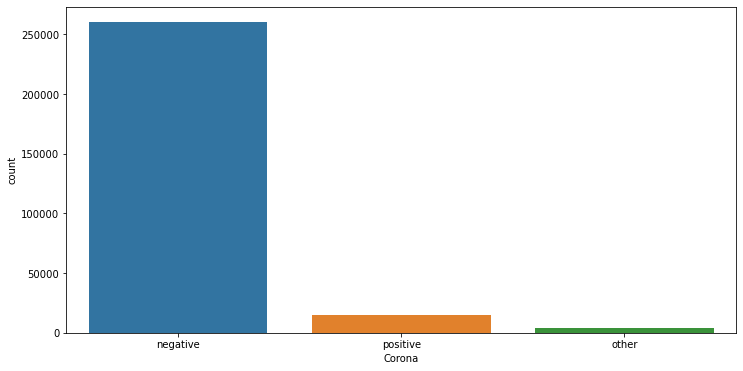

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Corona'])

This indicates that the dataset mainly includes patients with negative results. However, it also reveals the presence of some positive results and patients with different reasons for their conditions.

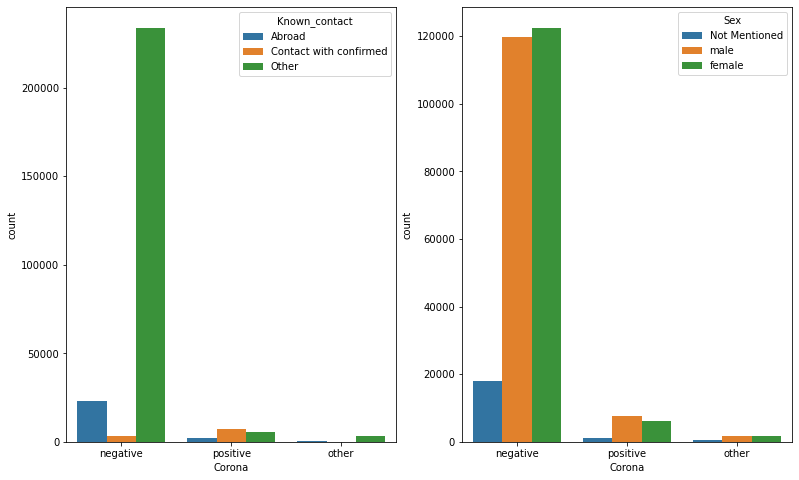

In [20]:
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
sns.countplot(x=df['Corona'],hue=df['Known_contact'])
plt.subplot(1,2,2)
sns.countplot(x=df['Corona'],hue=df['Sex'])
plt.show()

We observe that the majority of positive cases result from contact with people, with fewer cases originating from abroad. Additionally, it's noticeable that males are more affected than females in terms of gender distribution.

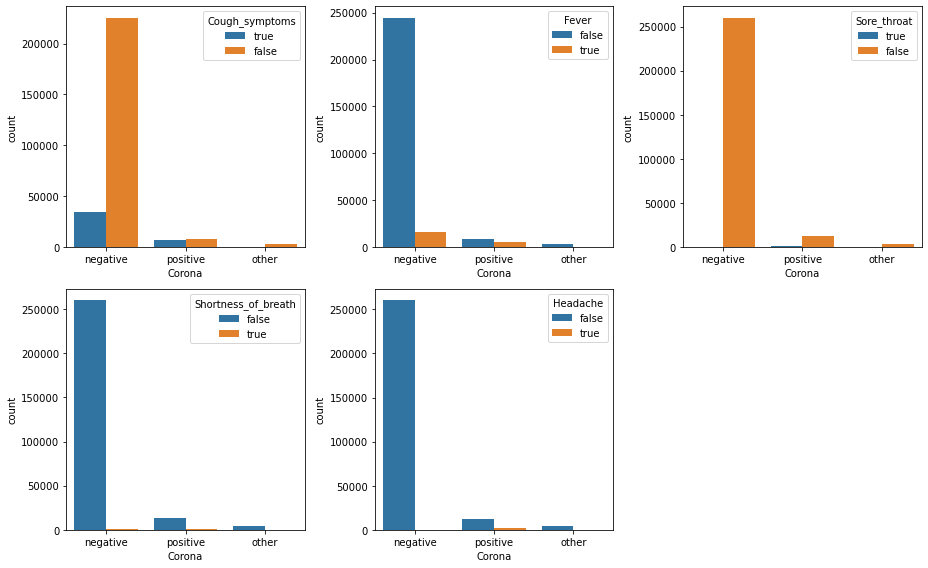

In [21]:
plt.figure(figsize=(13,8))
plt.subplot(2,3,1)
sns.countplot(x=df['Corona'],hue=df['Cough_symptoms'])
plt.subplot(2,3,2)
sns.countplot(x=df['Corona'],hue=df['Fever'])
plt.subplot(2,3,3)
sns.countplot(x=df['Corona'],hue=df['Sore_throat'])
plt.subplot(2,3,4)
sns.countplot(x=df['Corona'],hue=df['Shortness_of_breath'])
plt.subplot(2,3,5)
sns.countplot(x=df['Corona'],hue=df['Headache'])
plt.tight_layout()
plt.show()
#The Most Highlighting - Cough Symp and Fev

The graph indicates that people with positive cases mostly experience symptoms like cough and fever. Therefore, it suggests a strong likelihood of a person being positive if they exhibit these common symptoms observed in positive patients.

In [22]:
df['Test_date'] = df['Test_date'].astype('datetime64')
df['Month'] = df['Test_date'].dt.month
df['Year']=df['Test_date'].dt.year

In [23]:
df = df.drop(columns=['Test_date'])
df = df.drop(columns=['Year'])

In [24]:
df_encoded = pd.get_dummies(df, columns=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Known_contact','Sex','Age_60_above'],drop_first=True)
df_encoded.head()

,Ind_ID,Corona,Month,Cough_symptoms_true,Fever_true,Sore_throat_true,Shortness_of_breath_true,Headache_true,Known_contact_Contact with confirmed,Known_contact_Other,Sex_female,Sex_male,Age_60_above_Not Mentioned,Age_60_above_Yes
0,1,negative,11,1,0,1,0,0,0,0,0,0,1,0
1,2,positive,11,0,1,0,0,0,0,0,0,0,1,0
2,3,positive,11,0,1,0,0,0,0,0,0,0,1,0
3,4,negative,11,1,0,0,0,0,0,0,0,0,1,0
4,5,negative,11,1,0,0,0,0,1,0,0,0,1,0


We now have prepared data ready to be used in our model for making predictions.

In [25]:
df_encoded = df_encoded.drop(columns=['Ind_ID'])

In [26]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278847 entries, 0 to 278847
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   Corona                                278847 non-null  object
 1   Month                                 278847 non-null  int64 
 2   Cough_symptoms_true                   278847 non-null  uint8 
 3   Fever_true                            278847 non-null  uint8 
 4   Sore_throat_true                      278847 non-null  uint8 
 5   Shortness_of_breath_true              278847 non-null  uint8 
 6   Headache_true                         278847 non-null  uint8 
 7   Known_contact_Contact with confirmed  278847 non-null  uint8 
 8   Known_contact_Other                   278847 non-null  uint8 
 9   Sex_female                            278847 non-null  uint8 
 10  Sex_male                              278847 non-null  uint8 
 11  Age_60_above_

In [27]:
X = df_encoded.drop('Corona', axis=1)  # Features
y = df_encoded['Corona']  # Target variable

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
from sklearn.ensemble import RandomForestClassifier  

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
from sklearn.metrics import accuracy_score, classification_report , precision_score , recall_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9559799175183791
Classification Report:
              precision    recall  f1-score   support

    negative       0.96      0.99      0.98     51990
       other       0.00      0.00      0.00       822
    positive       0.77      0.61      0.68      2958

    accuracy                           0.96     55770
   macro avg       0.58      0.53      0.55     55770
weighted avg       0.94      0.96      0.95     55770



Now, we're dealing with a Multi-class classification challenge, where each class is treated independently. To better assess our model, we'll compute micro, macro, and weighted precision and recall. Using these metrics helps us get a clearer picture of the performance in this type of situation.

In [31]:
precision_micro = precision_score(y_test, y_pred, average='micro')
print(f'Precision (Micro): {precision_micro:.2f}')
precision_macro = precision_score(y_test, y_pred, average='macro')
print(f'Precision (Macro): {precision_macro:.2f}')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f'Precision (Weighted): {precision_weighted:.2f}')


Precision (Micro): 0.96
Precision (Macro): 0.58
Precision (Weighted): 0.94


In [32]:
recall_micro = recall_score(y_test,y_pred,average='micro')
print(f'Recall (Micro): {recall_micro:.2f}')
recall_macro = recall_score(y_test,y_pred,average='macro')
print(f'Recall (Macro): {recall_macro:.2f}')
recall_weighted = recall_score(y_test,y_pred,average='weighted')
print(f'Recall (Weighted): {recall_weighted:.2f}')

Recall (Micro): 0.96
Recall (Macro): 0.53
Recall (Weighted): 0.96


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.92268245 0.47835754 0.51442558 0.93720526 0.93322455]
Mean Accuracy: 0.7571790742527724


The cross-validation scores, ranging from 0.48 to 0.94, show how well our RandomForestClassifier model performs on different subsets of the data. The average accuracy, at 0.76, indicates the overall effectiveness of our model, suggesting it's a promising approach for creating a better-performing model.

In [ ]:
df_encoded.to_csv('clean_data.csv', index=False) 

For the SQL Queries : https://colab.research.google.com/drive/1P1igWGBQfj6LSmkmfZATan-tQZIk107R?usp=sharing